# Data exploration
In this section, we will explore which features of the dataset contribute to the car's price.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Set data directory

data_dir = 'data'

In [3]:
!unzip craigslist-carstrucks-data.zip -d $data_dir

Archive:  craigslist-carstrucks-data.zip
  inflating: data/vehicles.csv       


In [4]:
# Read in data

data = pd.read_csv(os.path.join(data_dir, 'vehicles.csv'))

data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


## Data clean-up
Drop rows whose year and price values are zero ornull. We will also drop columns that we will not be using for exploration.

In [6]:
df = data[data['price'] != 0]
df = df.dropna(subset=['year', 'manufacturer', 'model'])

df = df.drop(columns=['id', 'url', 'region', 'region_url', 'title_status', 'vin', 'image_url', 'description', 'county', 'lat', 'long', 'state'])

df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,manual,4wd,compact,hatchback,black
2,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,automatic,4wd,NaN,NaN,white
4,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,automatic,4wd,NaN,pickup,white
5,13999,2009.0,ram,NaN,NaN,NaN,gas,120057.0,automatic,4wd,NaN,pickup,silver
6,34500,2017.0,ford,f-350,NaN,NaN,diesel,95484.0,automatic,4wd,NaN,pickup,white


### Data filtering
Take only the entries that were posted from 2015 to 2019 and plot the distribution of data to within these years.

In [7]:
years = [2015, 2016, 2017, 2018, 2019]

df = df[df['year'].isin(years)]

df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
2,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,automatic,4wd,NaN,NaN,white
4,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,automatic,4wd,NaN,pickup,white
6,34500,2017.0,ford,f-350,NaN,NaN,diesel,95484.0,automatic,4wd,NaN,pickup,white
13,27999,2015.0,gmc,sierra,NaN,NaN,gas,73612.0,automatic,4wd,NaN,pickup,brown
16,35500,2015.0,gmc,sierra,NaN,NaN,diesel,127515.0,automatic,4wd,NaN,pickup,black


Save filtered dataset in case we need to load it in again in the future.

In [8]:
df.to_csv(os.path.join(data_dir, 'vehicles_filtered.csv'), index=False)

In [9]:
df = pd.read_csv(os.path.join(data_dir, 'vehicles_filtered.csv'))

126288


Text(0.5,1,'Entries per year')

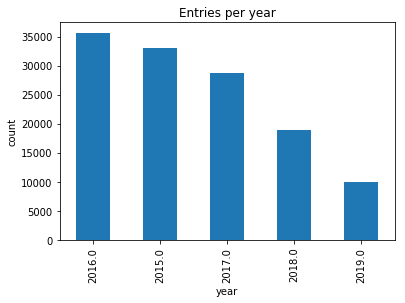

In [10]:
print(df.shape[0])
df['year'].value_counts().plot(kind='bar')
plt.xlabel('year')
plt.ylabel('count')
plt.title('Entries per year')

### Car model feature
The model feature requires additional clean-up. This is because unlike other features, the model column's exact text value can vary greatly depending on the poster's prerogative. For example, a car's actual model can ba 'civic' but the poster might opt to put in 'civic automatic' instead which is essentially the same category but, if unhandled, will result to its own separate category. This can be seen by simply viewing the raw model feature values.

In [11]:
df['model'].value_counts()

f-150                     3128
1500                      2548
silverado 1500            2201
2500                      1355
altima                    1351
                          ... 
sorento ex automatic         1
express 12 passenger         1
2500 4wd crew cab 149        1
xts 4dr sdn luxury fwd       1
cooper s sedan               1
Name: model, Length: 10101, dtype: int64

In [12]:
model_counts = df['model'].value_counts()

model_counts = model_counts[model_counts < 50] # Estimate to show redundant categories

model_counts

tucson se sport utility    49
focus se hatchback 4d      49
outback 2.5i limited       49
patriot sport              49
a7                         48
                           ..
sorento ex automatic        1
express 12 passenger        1
2500 4wd crew cab 149       1
xts 4dr sdn luxury fwd      1
cooper s sedan              1
Name: model, Length: 9737, dtype: int64

Use containtment to normalize redundant model classes

In [13]:
import re
from sklearn.feature_extraction.text import CountVectorizer

token_pattern = r'(?!19|20\d{2})\b[a-zA-Z0-9-.]+'

def calculate_containment(answer, source, n):    
    match = re.search(token_pattern, source)
    
    if not match:
        return 0
    
    counts = CountVectorizer(ngram_range=(1,n),
                             token_pattern=token_pattern) # Exclude year in model
    
    ngram_array = counts.fit_transform([answer, source]).toarray()
    
    intersections = [min(c, ngram_array[1][i]) for i, c in enumerate(ngram_array[0])]
    
    source_sum = np.sum(ngram_array[0])
    
    containment = np.sum(intersections) / np.sum(ngram_array[0]) if source_sum > 0 else 0
    
    return containment

In [14]:
def clean_model_feature(df_to_clean):    
    # Account for '-' only filler for model feature value
    df_to_clean[df_to_clean['model'] == '-'] = np.nan
    
    df_to_clean.dropna(subset=['model'], inplace=True)
    
    model_word_count = []
    
    for i in range(len(df_to_clean)):
        model = df_to_clean.iloc[i]['model']
        model_word_count.append(len(model.split()))
    
    df_to_clean['model_word_count'] = model_word_count
    
    df_to_clean.sort_values(by='model_word_count', inplace=True)
    
    model_manufacturer_classes = {}
    
    print_every = 10000
    
    df_len = len(df_to_clean)
    
    new_models = []
    
    for i in range(df_len):
        if i % print_every == 0:
            print('Processing row {}/{}'.format(i + 1, df_len))
            
        if df_to_clean.iloc[i]['model_word_count'] < 1:
            new_models.append('')
            
            continue
        
        model = df_to_clean.iloc[i]['model'].lower().replace('-', '')
        
        manufacturer = df_to_clean.iloc[i]['manufacturer']
        
        if manufacturer not in model_manufacturer_classes:
            model_manufacturer_classes[manufacturer] = []
            
        model_classes = model_manufacturer_classes[manufacturer]
        
        match_model_class = None
        
        for model_class in model_classes:
            if model == model_class:
                match_model_class = model
                break
            
            model_class_len = len(model_class.split())
            
            containment = calculate_containment(model, model_class, model_class_len)
            
            model_len = len(re.findall(token_pattern, model))
            
            if model_len == 0:
                continue
            
            if containment >= model_class_len / model_len:
                match_model_class = model_class
                break
                
        if match_model_class is None:
            match_model_class = model
            model_classes.append(model)
        
        new_models.append(match_model_class)
        
    df_to_clean['model'] = new_models

In [15]:
clean_model_df = df.copy()

clean_model_feature(clean_model_df)

clean_model_df = clean_model_df.drop(columns=['model_word_count'])

clean_model_df

Processing row 1/125685
Processing row 10001/125685
Processing row 20001/125685
Processing row 30001/125685
Processing row 40001/125685
Processing row 50001/125685
Processing row 60001/125685
Processing row 70001/125685
Processing row 80001/125685
Processing row 90001/125685
Processing row 100001/125685
Processing row 110001/125685
Processing row 120001/125685


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
63119,9995.0,2015.0,dodge,dart,NaN,NaN,gas,94030.0,automatic,fwd,NaN,sedan,NaN
94628,27245.0,2018.0,ford,f150,NaN,NaN,other,24692.0,automatic,4wd,NaN,pickup,white
94626,16555.0,2016.0,mercedes-benz,c,excellent,4 cylinders,gas,48702.0,automatic,4wd,compact,sedan,black
94625,39895.0,2016.0,mercedes-benz,gleclass,NaN,NaN,gas,51501.0,automatic,NaN,NaN,SUV,silver
46876,1500.0,2016.0,ford,fusion,like new,4 cylinders,gas,NaN,automatic,fwd,full-size,sedan,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120563,14999.0,2017.0,ford,transit,NaN,6 cylinders,NaN,97007.0,automatic,rwd,NaN,van,white
17644,34770.0,2015.0,toyota,tundra,NaN,8 cylinders,NaN,45215.0,automatic,4wd,NaN,pickup,red
84327,22900.0,2018.0,ford,transit,NaN,NaN,NaN,12118.0,automatic,rwd,NaN,NaN,NaN
28748,24997.0,2018.0,chevrolet,silverado,NaN,NaN,gas,23380.0,automatic,NaN,NaN,pickup,white


Save cleaned dataframe for loading later.

In [16]:
clean_model_df.to_csv(os.path.join(data_dir, 'vehicles_model.csv'), index=False)

In [18]:
model_counts = clean_model_df['model'].value_counts()

remove_threshold = 50

trimmed_df = clean_model_df[clean_model_df['model'].isin(model_counts[model_counts > remove_threshold].index)]

trimmed_df.to_csv(os.path.join(data_dir, 'vehicles_trimmed.csv'), index=False)

Delete _vehicles.csv_ since we don't longer need it.

In [19]:
!rm $data_dir/vehicles.csv

## Feature-price correlation
Here we explore how each feature is correlated, if at all, to the car's _price_.

Features to be explored are:
1. manufacturer
2. odometer
3. transmission
4. paint_color
5. fuel
6. type
7. drive
8. size
9. state

In [ ]:
# FILL CATEGORICAL FEATURES WITH NAN VALUES HERE

In [23]:
def plot_correlation(df, feature, fig_size=(6.4, 4.8), ylim=(0, 1e5)):
    plt.figure(figsize=fig_size)

    sb.boxplot(data = df, x = feature, y = 'price')
    plt.ylabel('price (USD)')
    plt.ylim(ylim)
    plt.xticks(rotation=45)

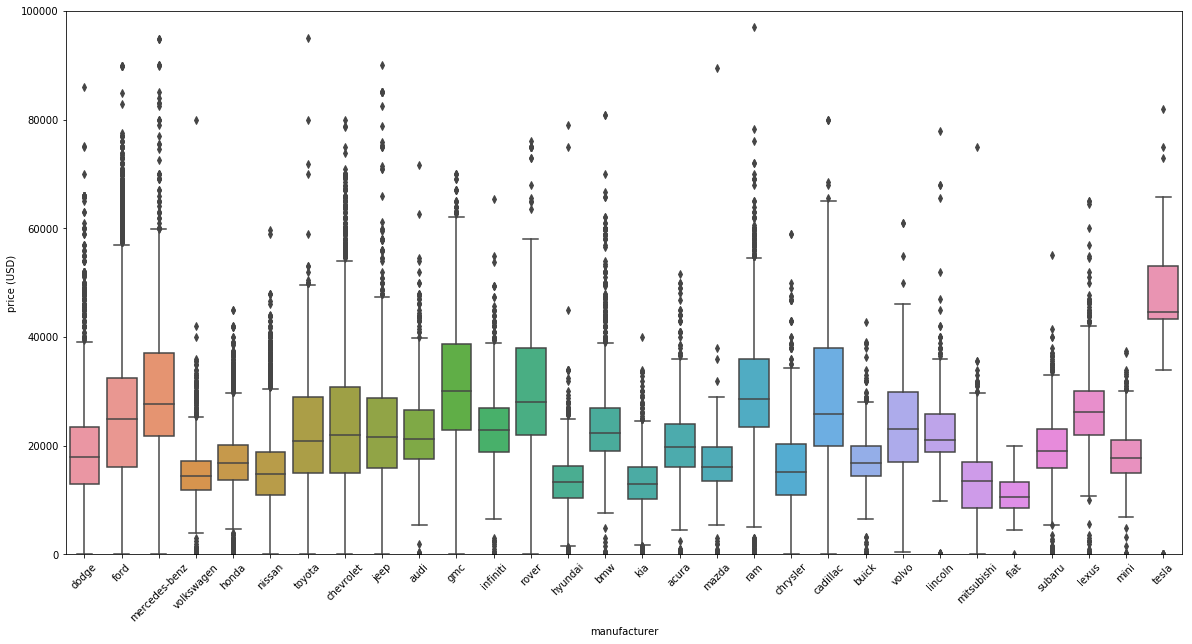

In [24]:
plot_correlation(trimmed_df, 'manufacturer', fig_size=(20,10))

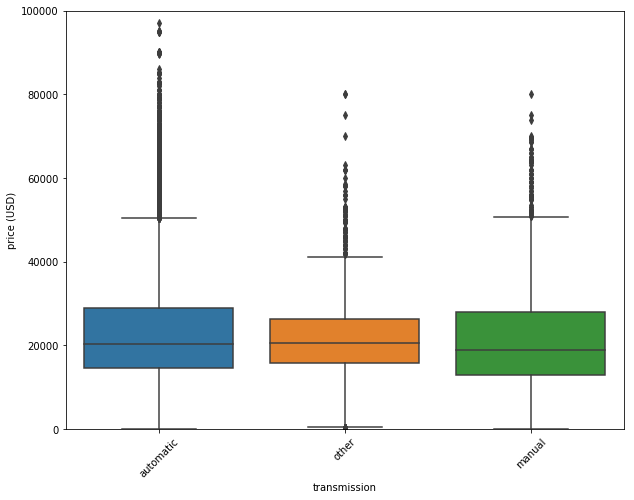

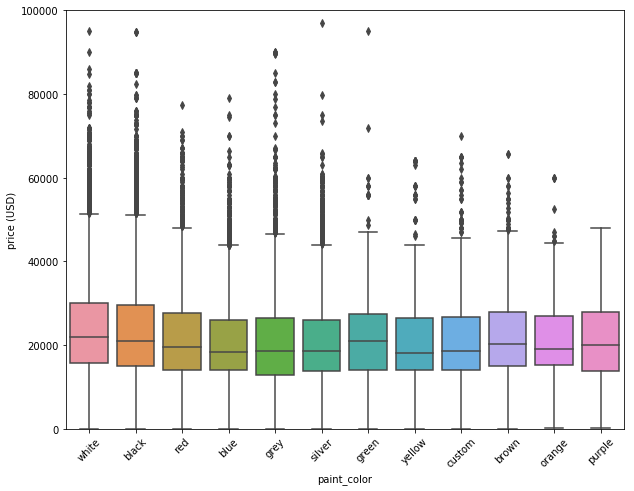

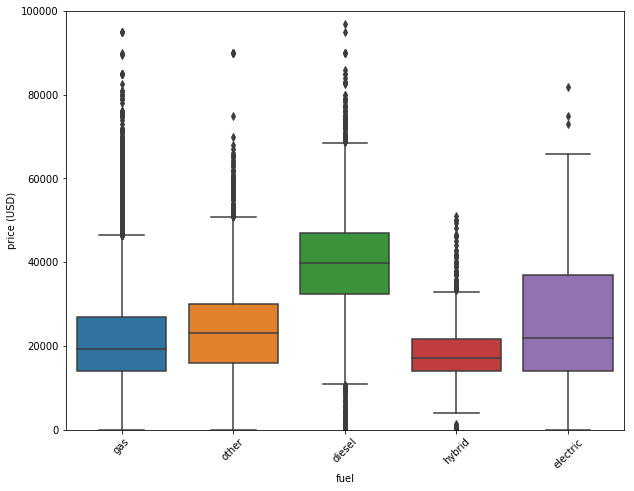

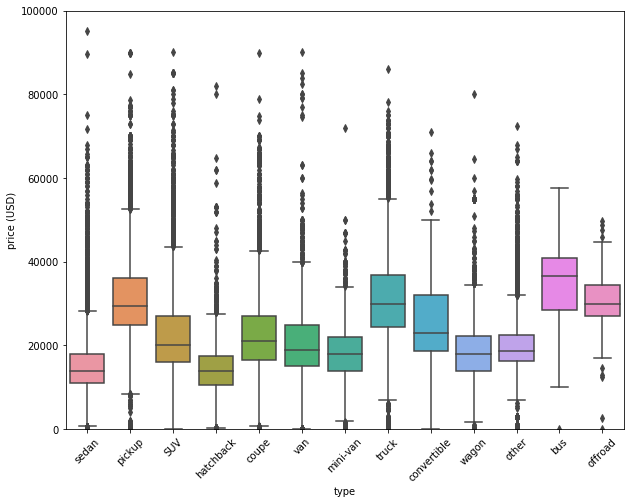

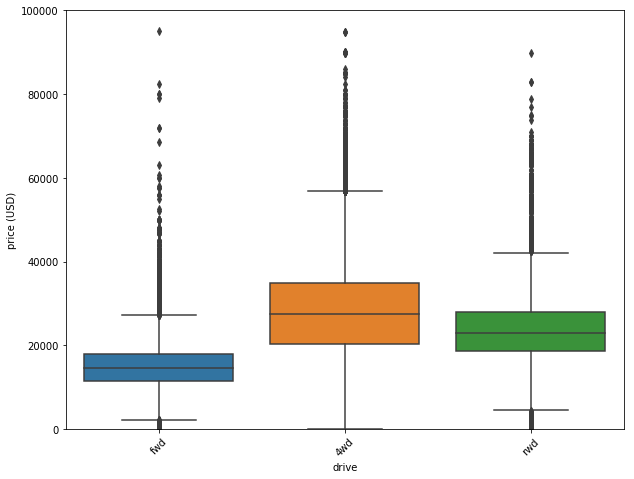

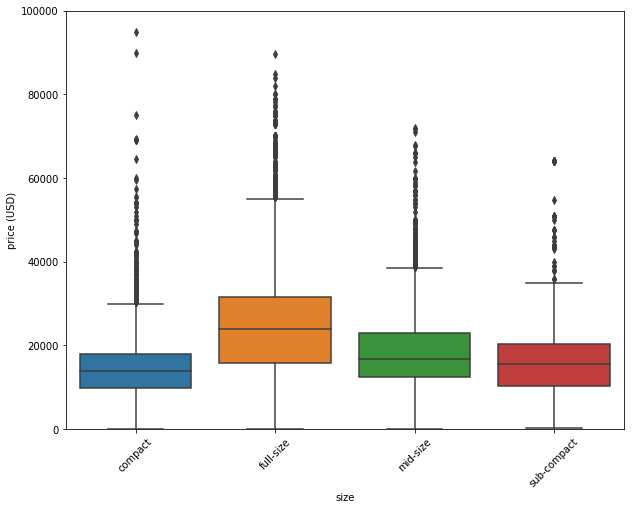

In [25]:
correlation_features = ['transmission', 'paint_color', 'fuel', 'type', 'drive', 'size']

for feature in correlation_features:
    plot_correlation(trimmed_df, feature, fig_size=(10, 7.7))

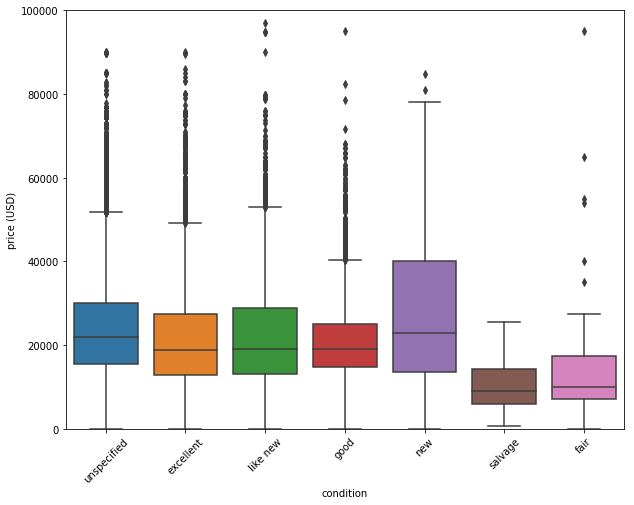

In [26]:
condition_df = trimmed_df.copy()
condition_df['condition'].fillna('unspecified', inplace=True)

plot_correlation(condition_df, 'condition', fig_size=(10, 7.7))

(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000.]),
 <a list of 9 Text xticklabel objects>)

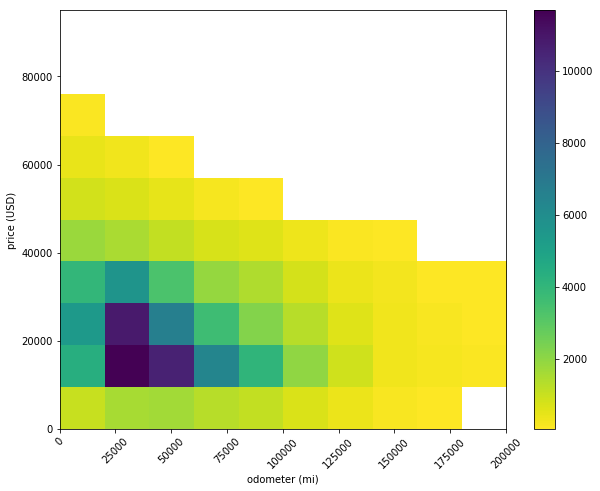

In [27]:
odometer_df = trimmed_df[trimmed_df['price'] <= 1e5]
odometer_df = odometer_df[odometer_df['odometer'] <= 2e5]

plt.figure(figsize=(10, 7.7))
plt.hist2d(data=odometer_df, x='odometer', y='price', cmap = 'viridis_r', cmin=50)
plt.colorbar();
plt.ylabel('price (USD)')
plt.xlabel('odometer (mi)')
plt.xticks(rotation=45)

In [28]:
cut_df = trimmed_df[trimmed_df['price'] <= 1e5]
cut_df = cut_df[cut_df['odometer'] <= 2e5]

cut_df.to_csv(os.path.join(data_dir, 'vehicles_cut.csv'), index=False)

## Categorical features distribution
Here we explore how balanced or imbalanced the distribution of our categorical features' classes are.

Features to be explored are:
1. model
2. manufacturer
3. transmission
4. paint_color
5. fuel
6. type
7. drive
8. size
9. type

In [29]:
import math

def plot_class_distribution(df, feature, fig_size=(6.4, 4.8), others_threshold=10, kind='bar'):
    counts = df[feature].value_counts(ascending=True)

    mask = counts[counts < others_threshold]
    others_count = mask.sum()

    if others_count > 0:
        counts = counts[counts >= others_threshold]
        counts = counts.sort_values(0)
        counts.loc['others'] = others_count

    plt.figure(figsize=fig_size)
    plt.ylabel(feature)
    plt.xlabel('count')
    plt.title('{} class distribution'.format(feature.capitalize()))

    counts.plot(kind=kind)

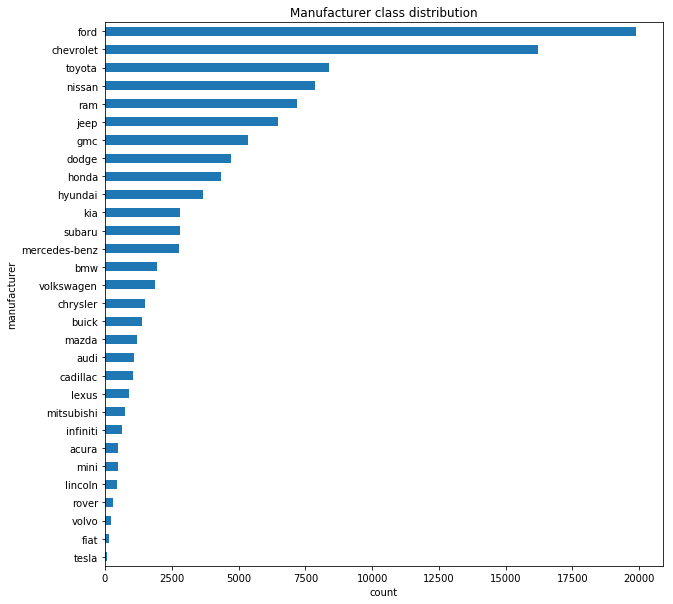

In [30]:
plot_class_distribution(cut_df, 'manufacturer', fig_size=(10, 10), others_threshold=50, kind='barh')

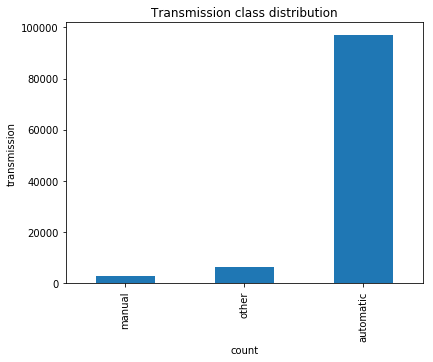

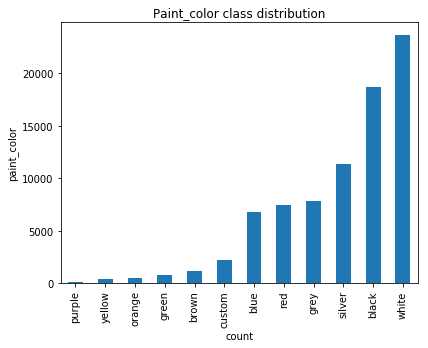

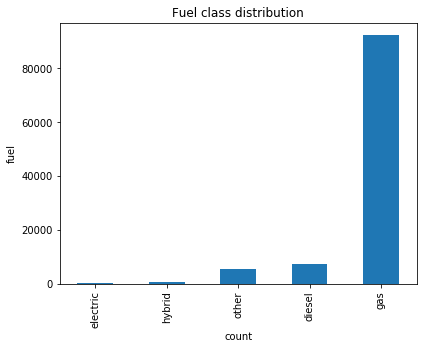

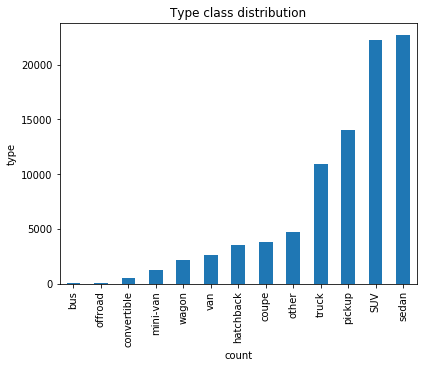

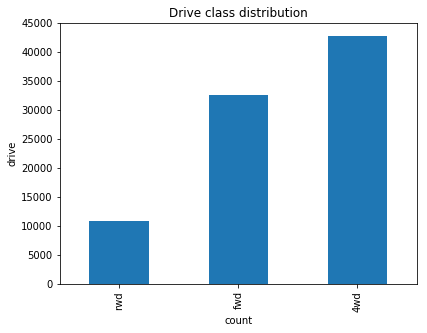

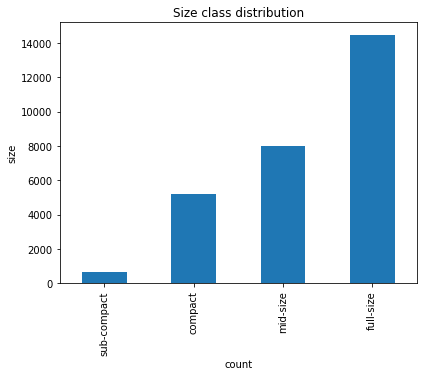

In [31]:
distribution_features = ['transmission', 'paint_color', 'fuel', 'type', 'drive', 'size']

for feature in distribution_features:
    plot_class_distribution(cut_df, feature)

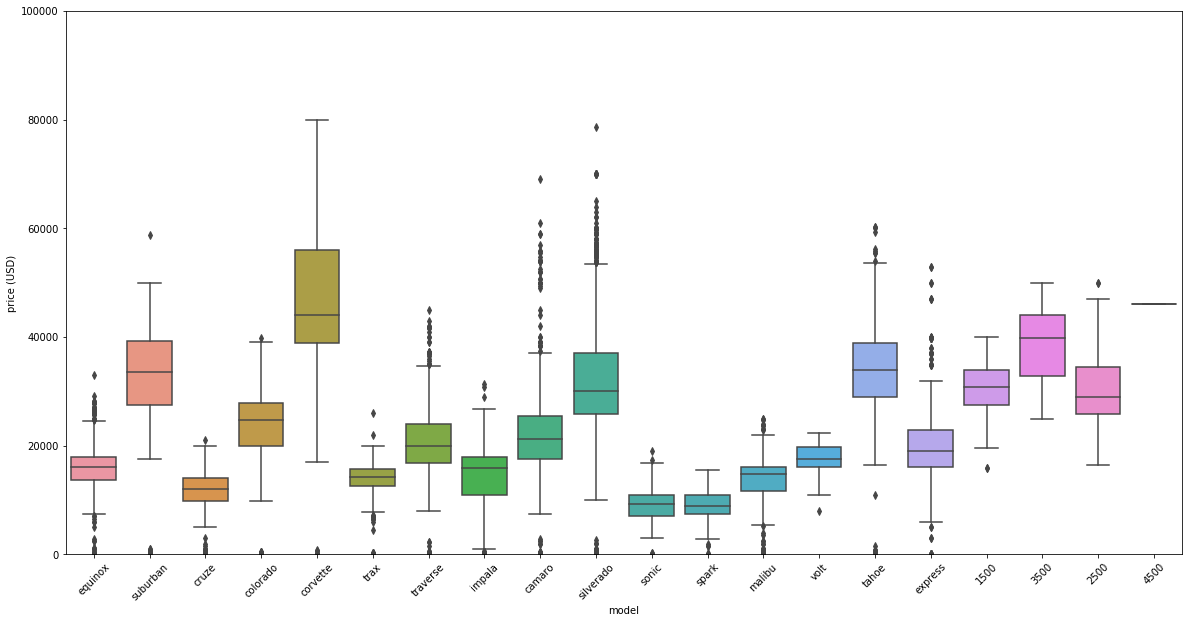

In [32]:
chevrolet_df = cut_df[cut_df['manufacturer'] == 'chevrolet']

plot_correlation(chevrolet_df, 'model', fig_size=(20,10))

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

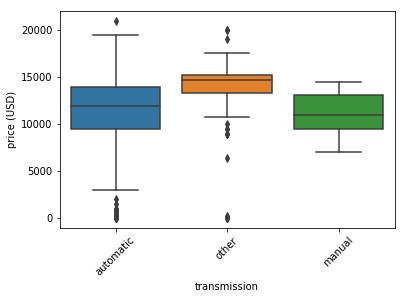

In [64]:
feature = 'transmission'

cruze_df = chevrolet_df[chevrolet_df['model'] == 'cruze']

sb.boxplot(data=cruze_df, x=feature, y='price')
plt.ylabel('price (USD)')
plt.xlabel(feature)
plt.xticks(rotation=45)

In [38]:
concat_df = cut_df.copy()

concat_df['model'] = concat_df['manufacturer'] + '-' + concat_df['model']

concat_df.drop(columns=['manufacturer'], inplace=True)

concat_df.to_csv(os.path.join(data_dir, 'vehicles_concat.csv'), index=False)

concat_df

,price,year,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,9995.0,2015.0,dodge-dart,NaN,NaN,gas,94030.0,automatic,fwd,NaN,sedan,NaN
1,27245.0,2018.0,ford-f150,NaN,NaN,other,24692.0,automatic,4wd,NaN,pickup,white
2,16555.0,2016.0,mercedes-benz-c,excellent,4 cylinders,gas,48702.0,automatic,4wd,compact,sedan,black
4,14977.0,2017.0,volkswagen-passat,NaN,4 cylinders,gas,32380.0,automatic,fwd,NaN,sedan,white
5,14995.0,2017.0,honda-accord,NaN,NaN,gas,44638.0,NaN,fwd,NaN,sedan,white
...,...,...,...,...,...,...,...,...,...,...,...,...
119031,14999.0,2017.0,ford-transit,NaN,6 cylinders,NaN,97007.0,automatic,rwd,NaN,van,white
119032,34770.0,2015.0,toyota-tundra,NaN,8 cylinders,NaN,45215.0,automatic,4wd,NaN,pickup,red
119033,22900.0,2018.0,ford-transit,NaN,NaN,NaN,12118.0,automatic,rwd,NaN,NaN,NaN
119034,24997.0,2018.0,chevrolet-silverado,NaN,NaN,gas,23380.0,automatic,NaN,NaN,pickup,white
